In [243]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [244]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

## Homework 1

#### Due 9/29

#### 30 parts, each part worth 1 point

### Linear Regression Analysis of hw1 dataset

#### 1. Read in hw1.csv 

In [245]:
df = pd.read_csv("hw1.csv")# Your code here
df.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties_Honey_Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


 #### The fields in the dataset are:
 
* name: Name of cereal  
* mfr: Manufacturer of cereal (A = American Home Food Products, G = General Mills, K = Kelloggs, N = Nabisco, P = Post, Q = Quaker Oats, R = Ralston Purina  
* type: C: cold H:hot  
* calories: calories per serving   
* protein: grams of protein 
* fat: grams of fat 
* sodium: milligrams of sodium   
* fiber: grams of dietary fiber   
* carbo: grams of complex carbohydrates   
* sugars: grams of sugars   
* potass: milligrams of potassium   
* vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended   
* shelf: display shelf (1, 2, or 3, counting from the floor)   
* weight: weight in ounces of one serving   
* cups: number of cups in one serving   
* rating: a rating of the cereals (Possibly from Consumer Reports?)  



### Goal of the analysis

The goal of this linear regression model to to predict the customer **rating** of the cereals based on the features given in the columns. We want the simplest model that explains the data.

The first step is an exploratory analysis. Looking a the features listed above, lets eliminate name, type,weight and cups from the model. 

#### 2. Create a new dataframe without name, type,weight and cups 

In [246]:
df = df.drop(["name", "type", "weight", "cups"], axis=1)# Your code here
df.head()

,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating
0,N,70,4,1,130,10.0,5.0,6,280,25,3,68.402973
1,Q,120,3,5,15,2.0,8.0,8,135,0,3,33.983679
2,K,70,4,1,260,9.0,7.0,5,320,25,3,59.425505
3,K,50,4,0,140,14.0,8.0,0,330,25,3,93.704912
4,R,110,2,2,200,1.0,14.0,8,-1,25,3,34.384843


### Clean the data.

Notice that potass has a value of -1 which clearly is not valid.

#### 3. Do any other columns have -1?

In [247]:
for var in df.columns:
    if any([True for val in df[var] if val==-1]):# Your code here
        print(var)
        

carbo
sugars
potass


#### 4. Replace negative values in carbo,sugars and potass with np.NaN


In [248]:
df.replace(to_replace=-1,value=np.nan, inplace=True)# Your code here
df.head()

,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating
0,N,70,4,1,130,10.0,5.0,6.0,280.0,25,3,68.402973
1,Q,120,3,5,15,2.0,8.0,8.0,135.0,0,3,33.983679
2,K,70,4,1,260,9.0,7.0,5.0,320.0,25,3,59.425505
3,K,50,4,0,140,14.0,8.0,0.0,330.0,25,3,93.704912
4,R,110,2,2,200,1.0,14.0,8.0,NaN,25,3,34.384843


#### 5. Check for null values

In [249]:
for var in df.columns:
    if df[var].isnull().values.any():
        print(var)# Your code here

carbo
sugars
potass


#### 6. Drop rows with null values

In [250]:
df = df.dropna()# Your code here

### Descriptive Statistics

#### 7. Summarize the data with the pandas describe function

In [251]:
df.describe()# Your code here

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,107.027027,2.513514,1.000000,162.364865,2.175676,14.729730,7.108108,98.513514,29.054054,2.216216,42.371787
std,19.843893,1.075802,1.006826,82.769787,2.423391,3.891675,4.359111,70.878681,22.294352,0.832067,14.033712
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,18.042851
25%,100.000000,2.000000,0.000000,135.000000,0.250000,12.000000,3.000000,41.250000,25.000000,1.250000,32.449210
50%,110.000000,2.500000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,40.253087
75%,110.000000,3.000000,1.000000,217.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,50.520610
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,93.704912


#### Lets look at levels of the categorical variable shelf


In [252]:
df.groupby(by=['shelf']).median()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
shelf,,,,,,,,,,
1,110,2,0,200,1.5,16.0,3.0,70.0,25,41.998933
2,110,2,1,165,0.0,13.0,12.0,45.0,25,30.577169
3,110,3,1,170,3.0,15.0,6.0,110.0,25,40.917047


#### 8. Create a boxplot for the dependent variable as a function of shelf

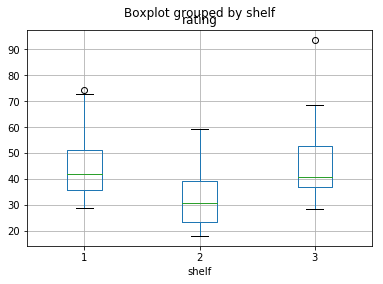

In [253]:
df.boxplot(column="rating", by="shelf")# Your code here

#### 9. Create a seaborn pairplot of all the variables with a 'kde' diagonal

This will take some time to execute

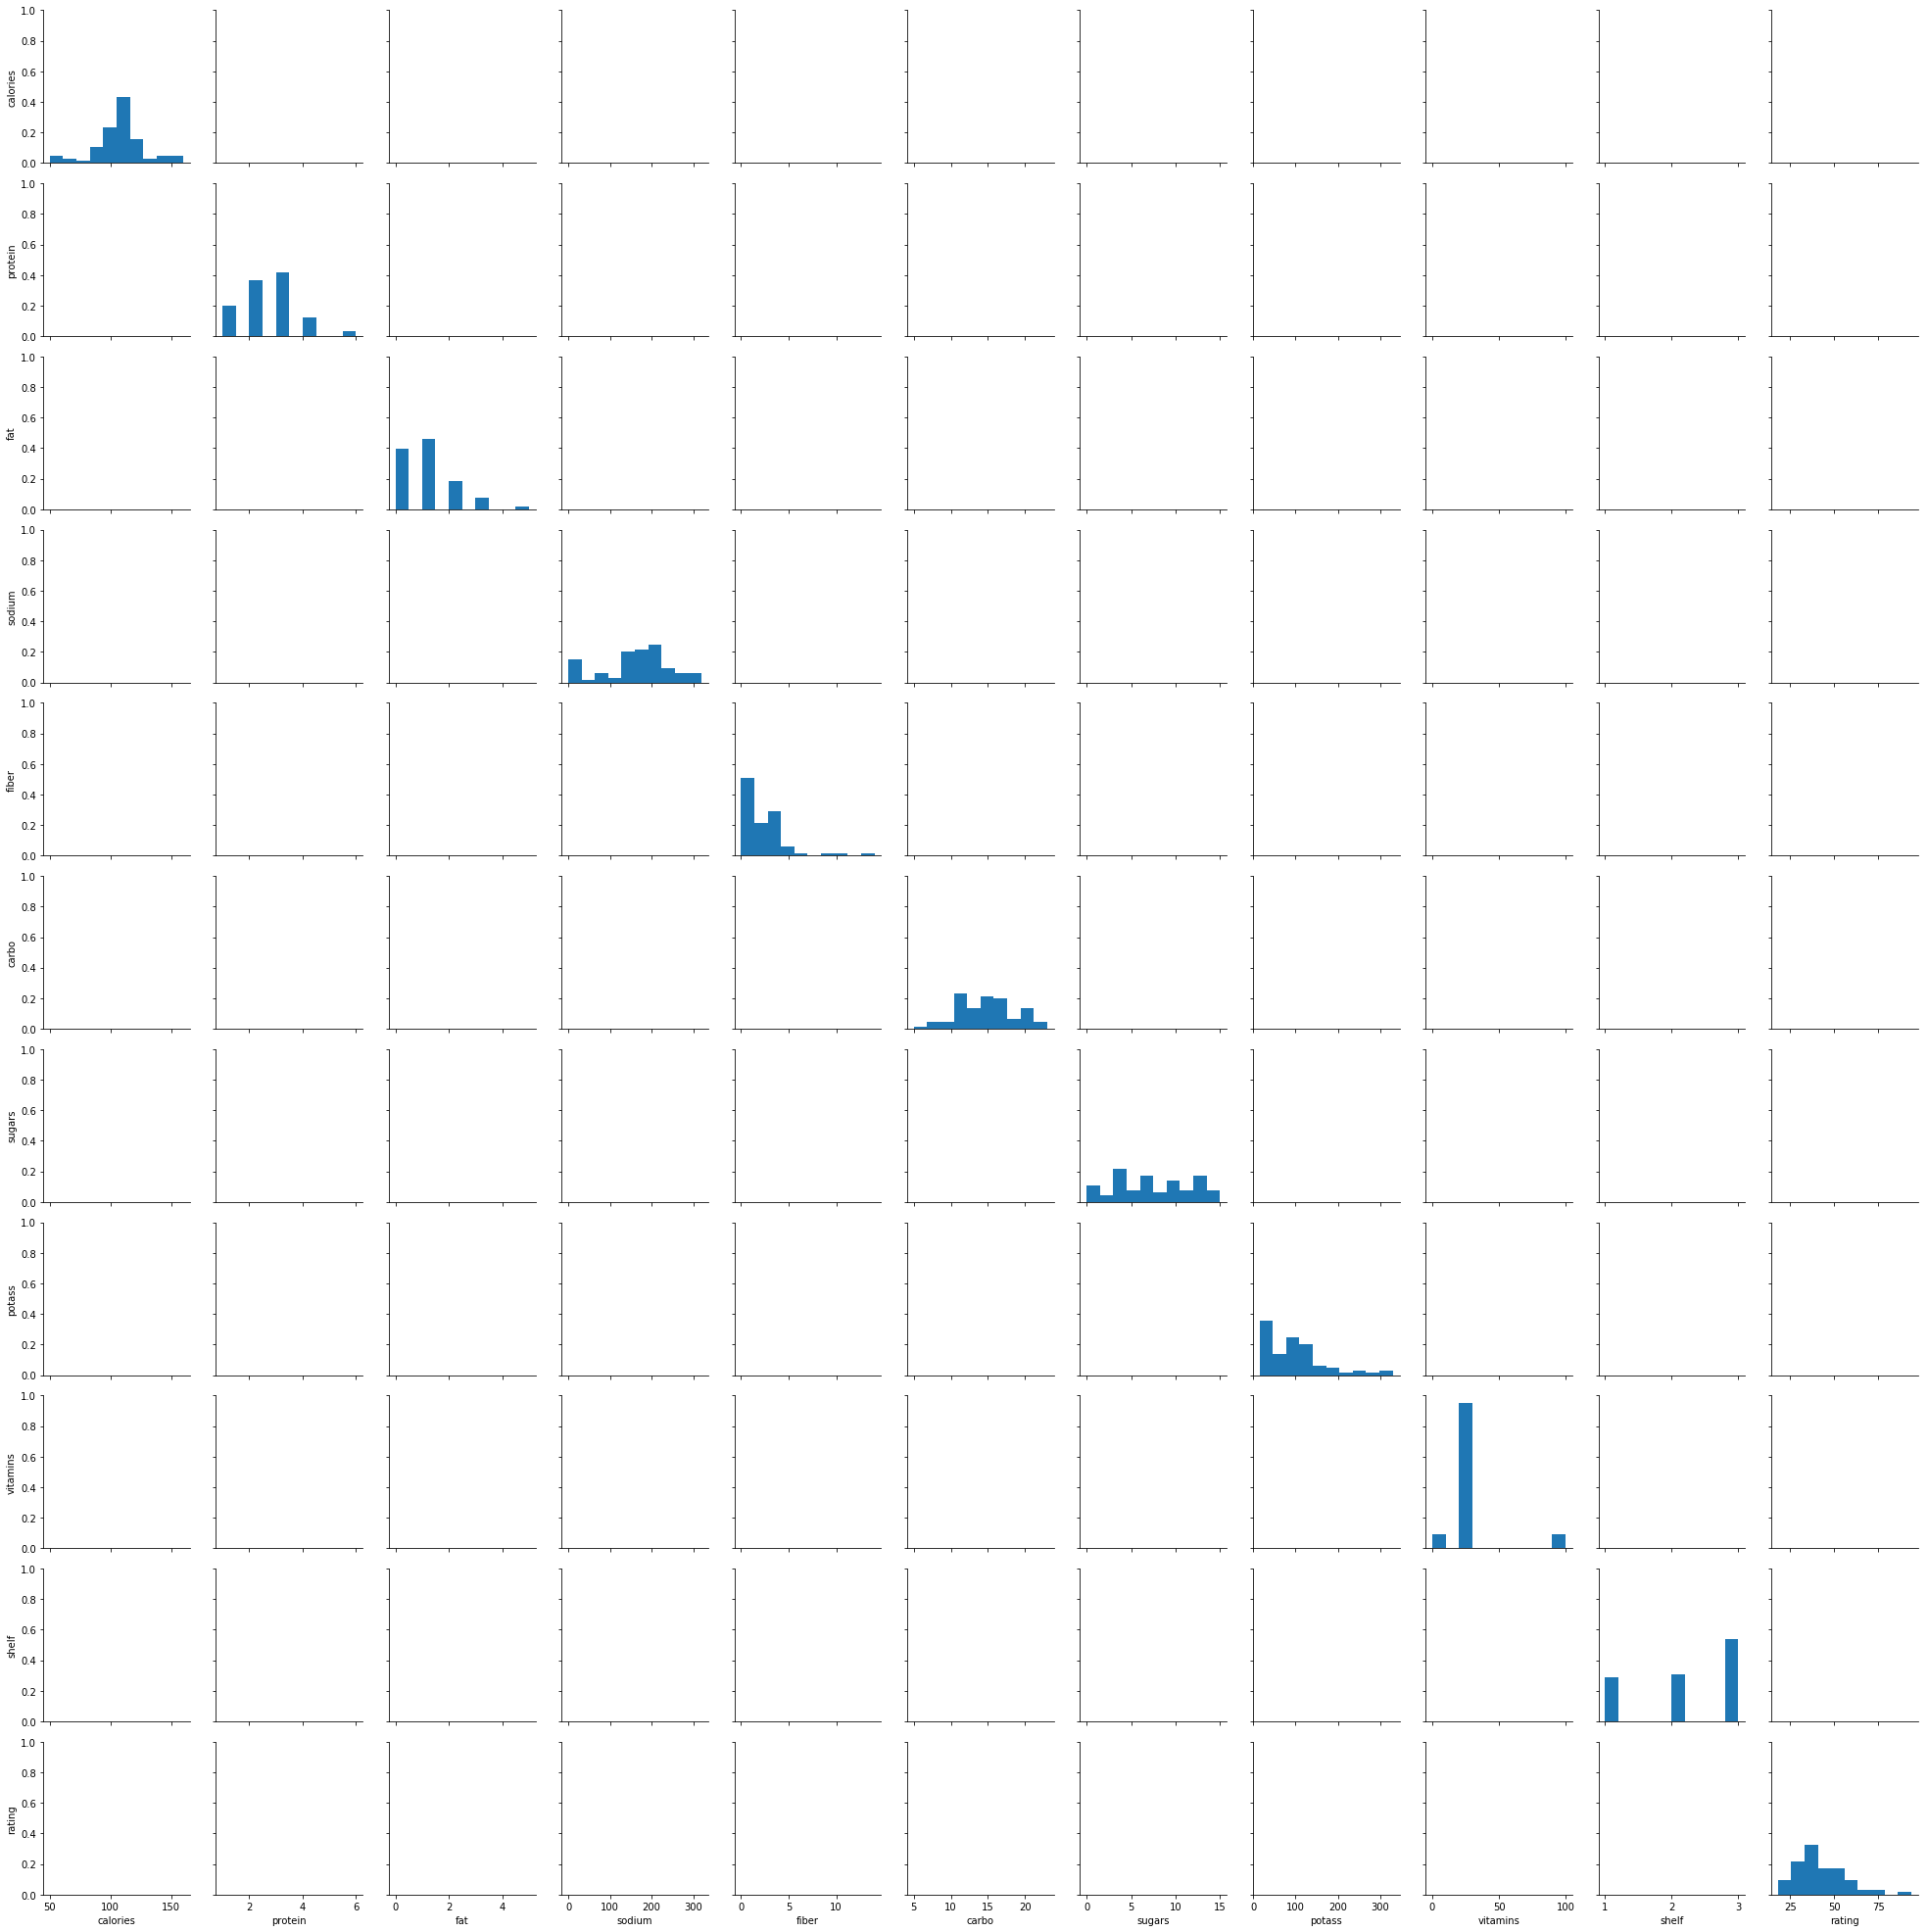

In [254]:
sns.pairplot(data=df, kind="kde")# Your code here

#### 10. Create a correlation matrix for all the non-categorical variables

In [255]:
df.drop(["shelf"], axis=1).corr()# Your code here

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
calories,1.000000,0.033992,0.507373,0.296247,-0.295212,0.270606,0.569121,-0.071361,0.259846,-0.693785
protein,0.033992,1.000000,0.202353,0.011559,0.514006,-0.036743,-0.286584,0.578743,0.054800,0.467162
fat,0.507373,0.202353,1.000000,0.000822,0.014036,-0.284934,0.287152,0.199637,-0.030514,-0.405050
sodium,0.296247,0.011559,0.000822,1.000000,-0.070735,0.328409,0.037059,-0.039438,0.331576,-0.383012
fiber,-0.295212,0.514006,0.014036,-0.070735,1.000000,-0.379084,-0.150949,0.911504,-0.038717,0.603411
carbo,0.270606,-0.036743,-0.284934,0.328409,-0.379084,1.000000,-0.452069,-0.365003,0.253579,0.055941
sugars,0.569121,-0.286584,0.287152,0.037059,-0.150949,-0.452069,1.000000,0.001414,0.072954,-0.755955
potass,-0.071361,0.578743,0.199637,-0.039438,0.911504,-0.365003,0.001414,1.000000,-0.002636,0.415782
vitamins,0.259846,0.054800,-0.030514,0.331576,-0.038717,0.253579,0.072954,-0.002636,1.000000,-0.214481
rating,-0.693785,0.467162,-0.405050,-0.383012,0.603411,0.055941,-0.755955,0.415782,-0.214481,1.000000


#### 11. Create a seaborn distribution plot of the dependent variable

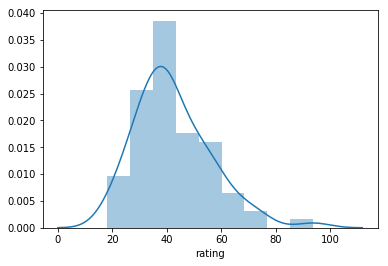

In [256]:
sns.distplot(pd.to_numeric(df["rating"]))# Your code here

### Data Preprocessing & Model

#### 12-21 Run model function

To facilitate running the Linear Regression multiple times, complete the code in the function below.

In [257]:
def run_model(df, target, feats, feats_scale=False):  
    ''' Parameters:
            df: the dataframe containing the features and the target
            target: the target variable name as a string
            feats: a list of feature names as strings
            feats_scale: a list of feature names as strings to scale or False
        Returns:
            the intercept, coefficient(s), predictions, y_test and R-squared
        '''
    
    X = df.loc[:,feats].values# 12. Your code here
    y = df[target].values# 13. Your code here
    
    X_train, X_test, y_train, y_test = train_test_split(X,y)# 14. Your code here (do not use a random seed)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
        
    if feats_scale:  # Scale the data if requested
        scale_idxs = list(map(feats.index,feats_scale))  # converts list of names to indexes
        scaler = StandardScaler()
        X_train[:,scale_idxs] = scaler.fit_transform(X_train[:,scale_idxs])
# 15-16 Your code here
    
    model = LinearRegression()# 17. Your code here #Instantiate the model
    model.fit(X_train, y_train)#18. Your code here # Fit model to the training data

    yhat = model.predict(X_test)# 19.Your code here #Predict the test data
    
    r2 = stats.pearsonr(X_test[:,0], y_test)[0] ** 2# 20.Your code here   #Calculate R-squared for the test data
    
    return model.intercept_, model.coef_, yhat, r2, (X_train,X_test,y_train,y_test)# 21. Your code here  # return the intercept, coefficient(s), predictions, y_test and R-squared 
# NOTE: I added a return to pull the exact train_test_split data for further comparison

### Simple Linear Regression


#### 22. Run a simple linear regression with sugars as the predictor (i.e. feature)

In [258]:
b = run_model(df, "rating", ["sugars"])# Your code here
b0, b1, R2=b[0], b[1], b[3]
print(f'Intercept: {b0} \nCoefs: {b1}\nR^2: {R2} ')

(55, 1) (19, 1) (55,) (19,)
Intercept: 60.262721339637665 
Coefs: [-2.66849937]
R^2: 0.46080332785782707 


#### 23.  Rerun model in 1.13. 

Notice the difference in the returns. Run a few times with and without scaling

In [268]:
b = run_model(df, "rating", ["sugars"])
b0,b1,b2,R3 = b[0],b[1],b[2],b[3]# Your code here
print(f'Intercept: {b0} \nCoefs: {b1}\nR^2: {R2} ')

(55, 1) (19, 1) (55,) (19,)
Intercept: 59.740993132214065 
Coefs: [-2.45036228]
R^2: 0.6007112683442478 


#### 24. Plot the residuals

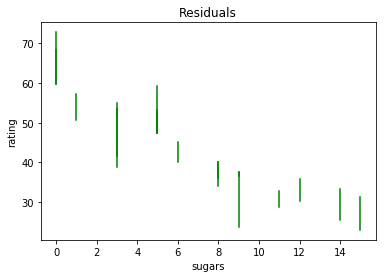

In [269]:
plt.title('Residuals')
plt.xlabel("sugars")
plt.ylabel("rating")
for i in range(len(b2)):
    plt.plot((b[-1][1][i],b[-1][1][i]),(b[-1][-1][i],b2[i]),'g-') #(x-coordinates from,to) (y-coordinates  from,to)
# Your code here

### Multiple Linear Regression

#### 25. Encode the  shelf variable so that there is no dummy variable trap.

In [270]:
df2 = pd.get_dummies(df,columns=['shelf'],drop_first=True)# Your code here
df2.head()

,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating,sugars2,shelf_2,shelf_3
0,N,70,4,1,130,10.0,5.0,6.0,280.0,25,68.402973,36.0,0,1
1,Q,120,3,5,15,2.0,8.0,8.0,135.0,0,33.983679,64.0,0,1
2,K,70,4,1,260,9.0,7.0,5.0,320.0,25,59.425505,25.0,0,1
3,K,50,4,0,140,14.0,8.0,0.0,330.0,25,93.704912,0.0,0,1
5,G,110,2,2,180,1.5,10.5,10.0,70.0,25,29.509541,100.0,0,0


#### 26. Run Multiple Linear Regression with features calories, fat, sugar and shelf

In [271]:
feats = ["calories", "fat", "sugars", "shelf_2", "shelf_3"]
b = run_model(df2, "rating", feats)
b0, b1, b2, R2 = b[0], b[1], b[2], b[3]# Your code here
print(f'Intercept: {b0} \nCoefs: {b1}\nR^2: {R2} ')

(55, 5) (19, 5) (55,) (19,)
Intercept: 74.46723715804958 
Coefs: [-0.18917591 -2.1391972  -1.57784164 -2.02048862  4.14288786]
R^2: 0.6146881917819966 


#### 27. Calculate the root Mean Square Error

In [272]:
rmse = np.sqrt(np.mean((b[-1][-1] - b2)**2))# Your code here
print("RMSE:",rmse)

RMSE: 9.465548780897844


#### 28. Run Multiple Linear Regression  with features  calories, fat, sugar and carbo


In [273]:
b = run_model(df, "rating", ["calories", "fat", "sugars", "carbo"])
b0, b1, b2, R3 = b[0], b[1], b[2], b[3]# Your code here
print(f'Intercept: {b0} \nCoefs: {b1}\nR^2: {R2} ')

(55, 4) (19, 4) (55,) (19,)
Intercept: 76.41082739735143 
Coefs: [ 0.34677798 -6.87790425 -3.54384956 -2.66763667]
R^2: 0.6146881917819966 


#### 29. Run Multiple Linear Regression  with  all the predictors except mfr. 

In [274]:
feats = list(df.columns)
feats.remove('mfr')
feats.remove('rating')
b = run_model(df, 'rating', feats)
b0, b1, b2, R2 = b[0], b[1], b[2], b[3]# Your code here
print(f'Intercept: {b0} \nCoefs: {b1}\nR^2: {R2} ')

(55, 11) (19, 11) (55,) (19,)
Intercept: 54.92718420643589 
Coefs: [-2.22724165e-01  3.27317387e+00 -1.69140797e+00 -5.44927029e-02
  3.44347977e+00  1.09245095e+00 -7.24895139e-01 -3.39933515e-02
 -5.12119675e-02 -6.73158060e-08 -3.02583271e-10]
R^2: 0.6297351253265144 


### Polynomial Linear Regression

####  30. Add a sugars squared variable to the data frame and run model with features sugars and sugars squared

In [275]:
df["sugars2"] = df["sugars"] ** 2
b = run_model(df, 'rating', ['sugars', 'sugars2'])
b0, b1, b2, R2 = b[0], b[1], b[2], b[3]# Your code here
print(f'Intercept: {b0} \nCoefs: {b1}\nR^2: {R2} ')

(55, 2) (19, 2) (55,) (19,)
Intercept: 66.96833206589795 
Coefs: [-5.65238717  0.22319227]
R^2: 0.6239702633036861 
